In [2]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
act_ca = pd.read_csv('data/act_2019_ca.csv')
sat_ca = pd.read_csv('data/sat_2019_ca.csv')
districts = pd.read_csv('data/pubdistricts.txt', sep = '\t')

### County, district, school sizes

In [4]:
act_ca.groupby('RType').count()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
RType,,,,,,,,,,,,,,,,,
C,58,58,58,58,0,0,58,58,58,57,57,57,57,57,57,58,0
D,522,522,522,0,0,522,522,522,522,459,459,459,459,459,459,522,0
S,1728,1728,1728,1728,1728,1728,1728,1728,1728,1436,1436,1436,1436,1436,1436,1728,0
X,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [5]:
sat_ca.groupby('RType').count()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
RType,,,,,,,,,,,,,,,,,,,,,
C,58,58,58,58,0,0,58,58,58,57,...,57,57,57,57,57,57,57,57,58,0
D,539,539,539,539,0,539,539,539,539,501,...,495,495,495,495,501,501,495,495,539,0
S,1981,1981,1981,1981,1981,1981,1981,1981,1981,1745,...,1716,1716,1716,1716,1745,1745,1716,1716,1981,0
X,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [6]:
print(districts.shape)
districts.sample(5)

(1088, 24)


,CD Code,County,District,Street,City,Zip,State,MailStreet,MailCity,MailZip,...,Email,AdmFName,AdmLName,AdmEmail,Latitude,Longitude,DOC,DOCType,StatusType,LastUpDate
640,3675051,San Bernardino,Lucerne Valley Unified,8560 Aliento Road,Lucerne Valley,92356-7678,CA,8560 Aliento Road,Lucerne Valley,92356-7678,...,peter_livingston@lucernevalleyusd.org,Peter,Livingston,peter_livingston@lucernevalleyusd.org,34.408040,-116.90672,54,Unified School District,Active,05/02/2019
1011,5471985,Tulare,Liberty Elementary,1771 East Pacific Avenue,Tulare,93274-1106,CA,1771 East Pacific Avenue,Tulare,93274-1106,...,No Data,Deanna,Cardoza,dcardoza@liberty.k12.ca.us,36.247655,-119.31323,52,Elementary School District,Active,11/10/2020
230,1563719,Kern,Pond Union Elementary,29585 Pond Road,Wasco,93280-0927,CA,29585 Pond Road,Wasco,93280-0927,...,khoward@pond.k12.ca.us,Alex,Lopez,alopez@pond.k12.ca.us,35.717699,-119.32080,52,Elementary School District,Active,07/15/2019
275,1864139,Lassen,Lassen Union High,1000 Main Street,Susanville,96130-4409,CA,1000 Main Street,Susanville,96130-4409,...,No Data,Morgan,Nugent,morgan.nugent@lassenhigh.org,40.417396,-120.65775,56,High School District,Active,05/06/2019
436,2465821,Merced,Planada Elementary,9722 East Haskell Avenue,Planada,95365-8050,CA,PO Box 236,Planada,95365-0236,...,cmurillo@planada.org,José,González,jgonzalez@planada.org,37.292925,-120.31164,52,Elementary School District,Active,08/21/2019


Should be 1088 districts - only half take either SAT's or ACTs.

In [7]:
# But some districts have no high schools 
districts.iloc[543]

CD Code                          3166910
County                            Placer
District       Roseville City Elementary
Street                  1050 Main Street
City                           Roseville
Zip                           95678-2067
State                                 CA
MailStreet              1050 Main Street
MailCity                       Roseville
MailZip                       95678-2067
MailState                             CA
Phone                     (916) 771-1600
Ext                              No Data
FaxNumber                 (916) 771-1620
Email                            No Data
AdmFName                            Derk
AdmLName                          Garcia
AdmEmail              dgarcia@rcsdk8.org
Latitude                       38.751856
Longitude                      -121.3046
DOC                                   52
DOCType       Elementary School District
StatusType                        Active
LastUpDate                    02/10/2020
Name: 543, dtype

In [27]:
act_size = act_ca[['CDS', 'RType']]
sat_size = sat_ca[['CDS', 'RType', 'Enroll12', 'Enroll11']]

In [28]:
df_all = pd.merge(act_size, sat_size, how = 'outer', on = 'CDS') # entities with either act or sat
df_both = pd.merge(act_size, sat_size, how = 'inner', on = 'CDS') # entities with both act and Sat

In [30]:
df_all.head()
# df_both.head()

,CDS,RType_x,RType_y,Enroll12,Enroll11
0,3.366993e+13,S,S,18.0,34.0
1,1.964212e+13,S,S,58.0,13.0
2,1.563776e+13,S,S,18.0,27.0
3,4.369666e+13,S,S,463.0,453.0
4,1.964733e+13,S,S,226.0,234.0


In [26]:
# ~df_all[df_all['Enroll12_x'] != df_all['Enroll12_y']].isna().any(axis = 1).any() 
# Enrollment numbers agree

False

In [10]:
# 280 entities are ACT only, 10 are SAT only
df_all.isna().sum()

CDS             1
RType_x       280
Enroll12_x    280
RType_y        10
Enroll12_y     10
Enroll11       10
dtype: int64

In [15]:
df_both.groupby('RType').count()

KeyError: 'RType'

(array([ 34.,  81., 425., 784., 971., 220.,  48.,  11.,   4.,   1.]),
 array([ 0.        ,  1.31014482,  2.62028963,  3.93043445,  5.24057927,
         6.55072409,  7.8608689 ,  9.17101372, 10.48115854, 11.79130335,
        13.10144817]),
 <BarContainer object of 10 artists>)

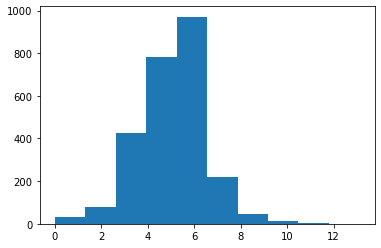

In [ ]:
plt.hist(np.log(df_all['Enroll12_y'] + 1))

<AxesSubplot:>

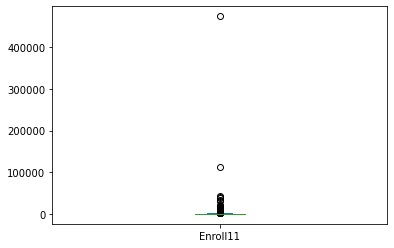

In [ ]:
df_all['Enroll11'].plot(kind = 'box')

In [ ]:
df_districts = df_all.query('RType_x == "D"')
df_districts.shape

(522, 6)

(array([ 35.,  41.,  77., 103.,  93.,  92.,  60.,  18.,   2.,   1.]),
 array([ 2.63905733,  3.43939364,  4.23972994,  5.04006625,  5.84040255,
         6.64073886,  7.44107516,  8.24141147,  9.04174778,  9.84208408,
        10.64242039]),
 <BarContainer object of 10 artists>)

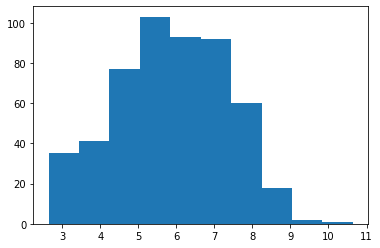

In [ ]:
plt.hist(np.log(df_districts['Enroll12_y'] + 1))

<AxesSubplot:>

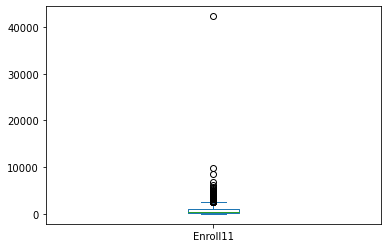

In [ ]:
df_districts['Enroll11'].plot(kind = 'box')

In [ ]:
np.exp([2.64, 8.24, 10.64])

array([1.40132036e+01, 3.78954031e+03, 4.17727712e+04])

Size is very inhomogeneous - even when we filter to only districts. Districts vary from 14 to more than 40,000 students.

(array([ 35.,  41.,  77., 103.,  93.,  92.,  60.,  18.,   2.,   1.]),
 array([ 2.63905733,  3.43939364,  4.23972994,  5.04006625,  5.84040255,
         6.64073886,  7.44107516,  8.24141147,  9.04174778,  9.84208408,
        10.64242039]),
 <BarContainer object of 10 artists>)

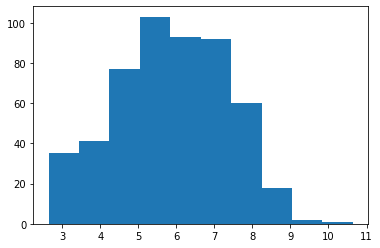

In [ ]:
plt.hist(np.log(df_all.query('RType_x == "D"')['Enroll12_y'] + 1))

(array([  5.,   5.,  82., 134., 187., 268., 237., 240., 470.,  91.]),
 array([1.38629436, 1.95119178, 2.51608921, 3.08098663, 3.64588406,
        4.21078148, 4.7756789 , 5.34057633, 5.90547375, 6.47037118,
        7.0352686 ]),
 <BarContainer object of 10 artists>)

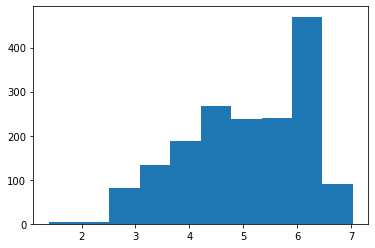

In [ ]:
plt.hist(np.log(df_all.query('RType_x == "S"')['Enroll12_y'] + 1))